## ***Customer Purchase Behavior Analysis: From Exploratory Insights to Predictive Modeling***

> Renu

> Renu@students.sau.ac.in





This project applies exploratory data analysis, statistical testing, and predictive modeling to understand customer purchasing behavior across income groups, household structures, and marketing channels.

The analysis identifies what truly drives spending, deal sensitivity, and store purchases, with a focus on translating data patterns into actionable marketing and strategy insights.



In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Suppress warnings for cleaner output
warnings.simplefilter(action="ignore", category=FutureWarning)

# Configure pandas to display all columns
pd.set_option("display.max_columns", None)

# Configure Seaborn styles for better visualizations
sns.set_context('notebook')  # Sets the context for the plots
sns.set_style('whitegrid')   # Sets the style for the background of the plots
sns.set_palette('Blues_r')   # Sets the color palette for the plots

# Load the dataset
data_path = '/content/ifood_df.csv'
df = pd.read_csv(data_path)
print(f"Dataset loaded successfully! Shape: {df.shape}")

Dataset loaded successfully! Shape: (2205, 39)


In [2]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


I began by examining data types, missing values, and duplicate observations. This step validates data integrity and prevents biased insights driven by structural issues rather than actual customer behavior.


In [3]:
# Check data types of all columns
print("Column Data Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Column Data Types:
Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow        

In [4]:
# Find and count exact duplicates
duplicate_rows = df[df.duplicated()]
print(f"Exact duplicate rows: {duplicate_rows.shape[0]}")



Exact duplicate rows: 184


In [5]:
df.drop_duplicates(inplace=True)

Boxplots are used to identify extreme spending and purchase patterns. Rather than removing outliers blindly, this step helps distinguish between genuine high-value customers and data anomalies, a critical distinction for marketing strategy.

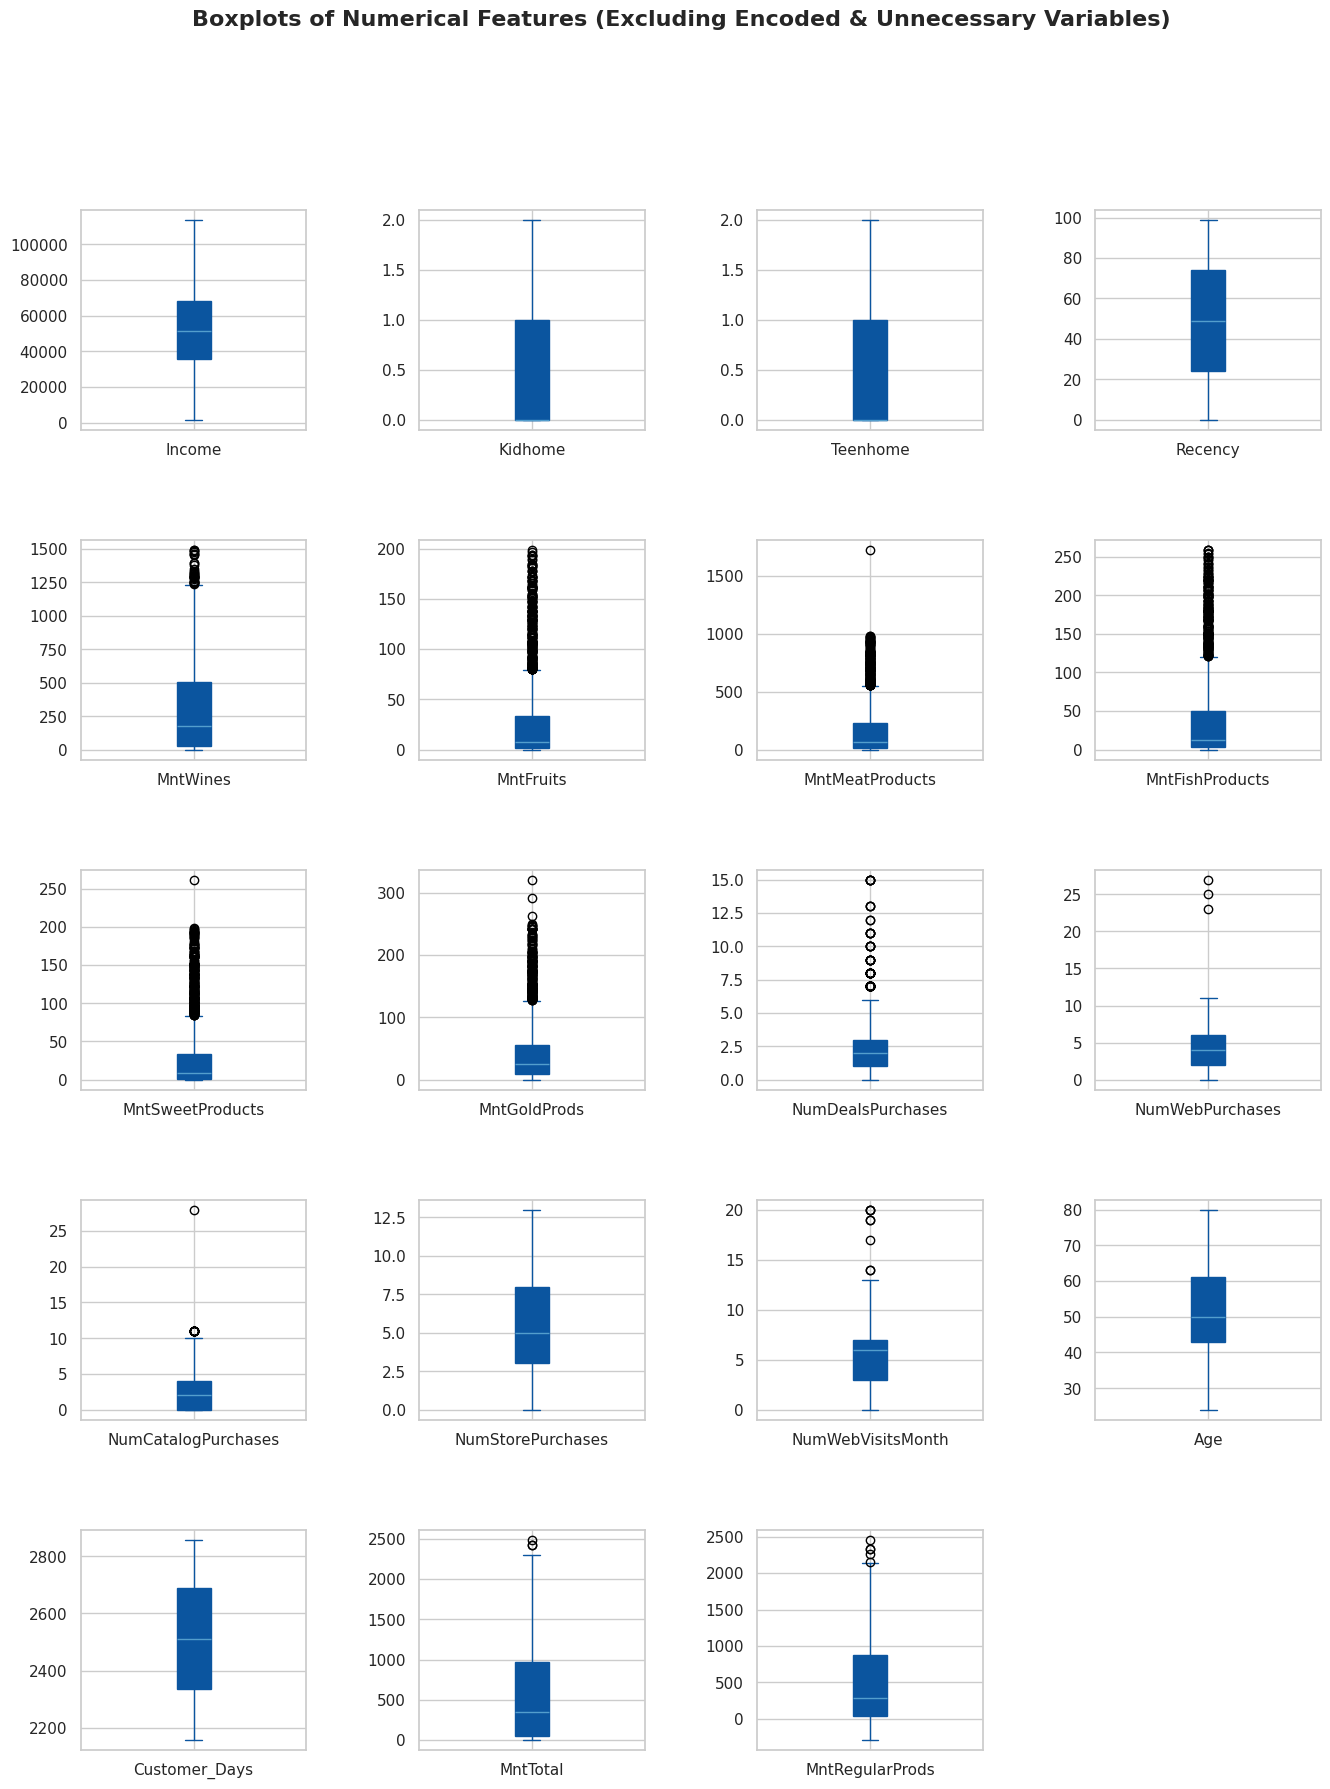

In [6]:
# Exclude categorical, campaign-related, one-hot encoded, and unnecessary columns
exclude_cols = [
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
    'AcceptedCmp5', 'Response', 'Complain', 'AcceptedCmpOverall',
    'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow',
    'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD',
    'Z_Revenue', 'Z_CostContact'  # Removing unnecessary columns
]

# Select only numerical columns for boxplots
df_to_plot = df.drop(columns=exclude_cols, errors='ignore').select_dtypes(include=np.number)

# Determine optimal subplot layout (4 columns, dynamic rows)
num_cols = len(df_to_plot.columns)
rows = (num_cols // 4) + (num_cols % 4 > 0)  # Ensures enough rows

# Create boxplots for numerical columns
df_to_plot.plot(subplots=True, layout=(rows, 4), kind='box',
                figsize=(16, rows * 4), patch_artist=True)

# Adjust spacing for better readability
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle("Boxplots of Numerical Features (Excluding Encoded & Unnecessary Variables)", fontsize=16, fontweight='bold')
plt.show()


Consumer spending data is non-linear and skewed. Kendall’s Tau was chosen to capture monotonic relationships robustly, reducing sensitivity to outliers and distributional assumptions common in marketing datasets.

<Figure size 1200x1000 with 0 Axes>

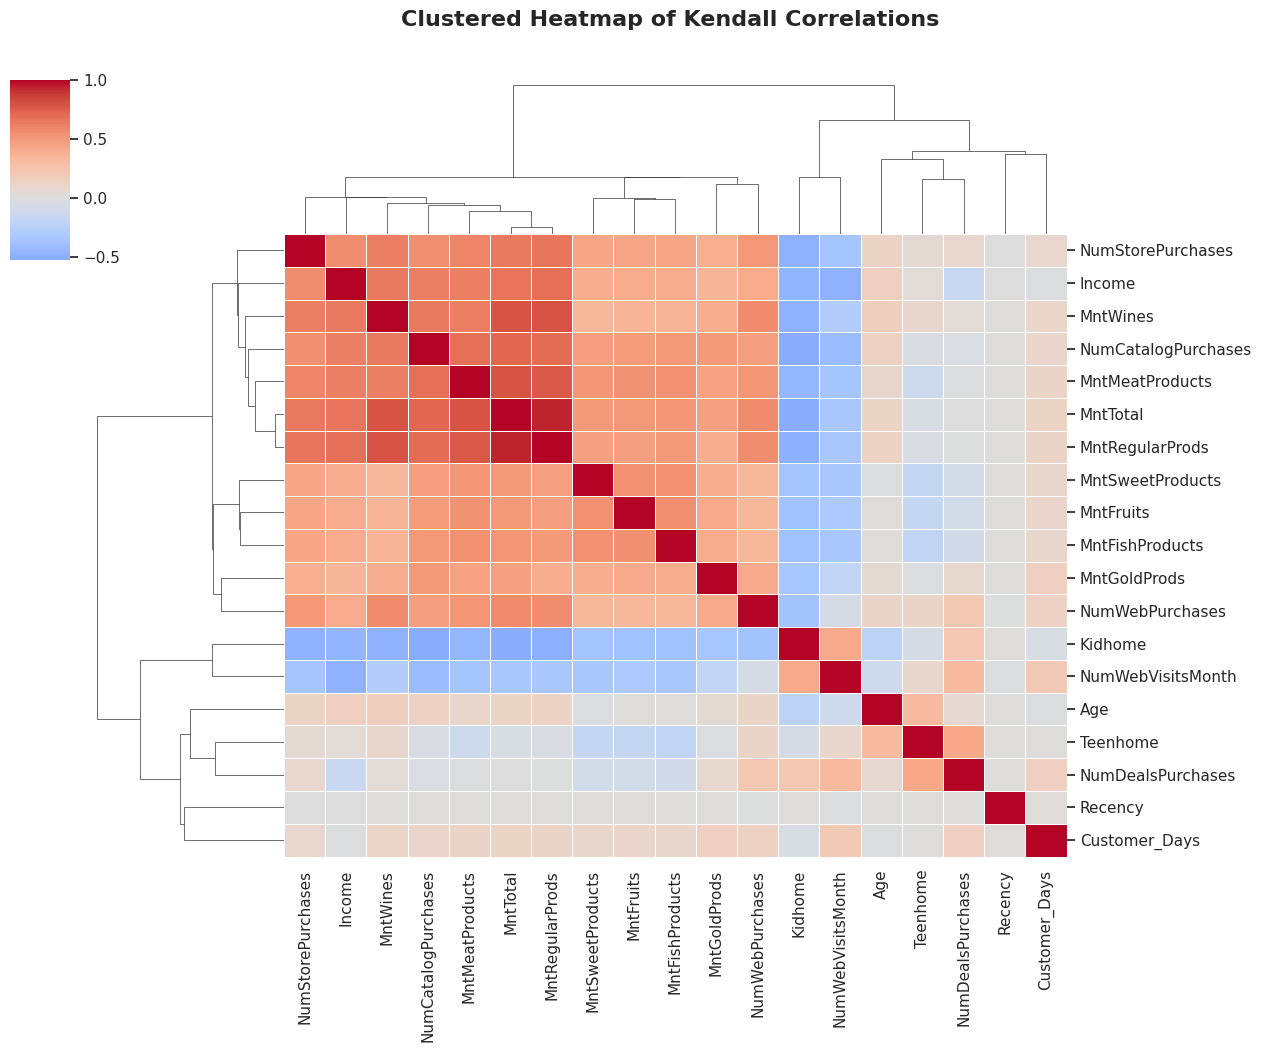

In [7]:
# Compute Kendall correlation matrix
corrs = df.drop(columns=exclude_cols, errors='ignore').select_dtypes(include=np.number).corr(method='kendall')

# Create the clustermap
plt.figure(figsize=(12, 10))
sns.clustermap(corrs, cmap='coolwarm', center=0, cbar_kws={"shrink": 0.8},
               linewidths=0.5, annot=False, fmt=".2f", figsize=(12, 10),
               cbar_pos=(-0.05, 0.8, 0.05, 0.18))
plt.suptitle("Clustered Heatmap of Kendall Correlations", fontsize=16, fontweight='bold', y=1.05)
plt.show()


Customers were segmented into income groups to study whether spending behavior scales linearly with income or plateaus beyond a threshold. This helps identify whether premium targeting actually delivers incremental value.

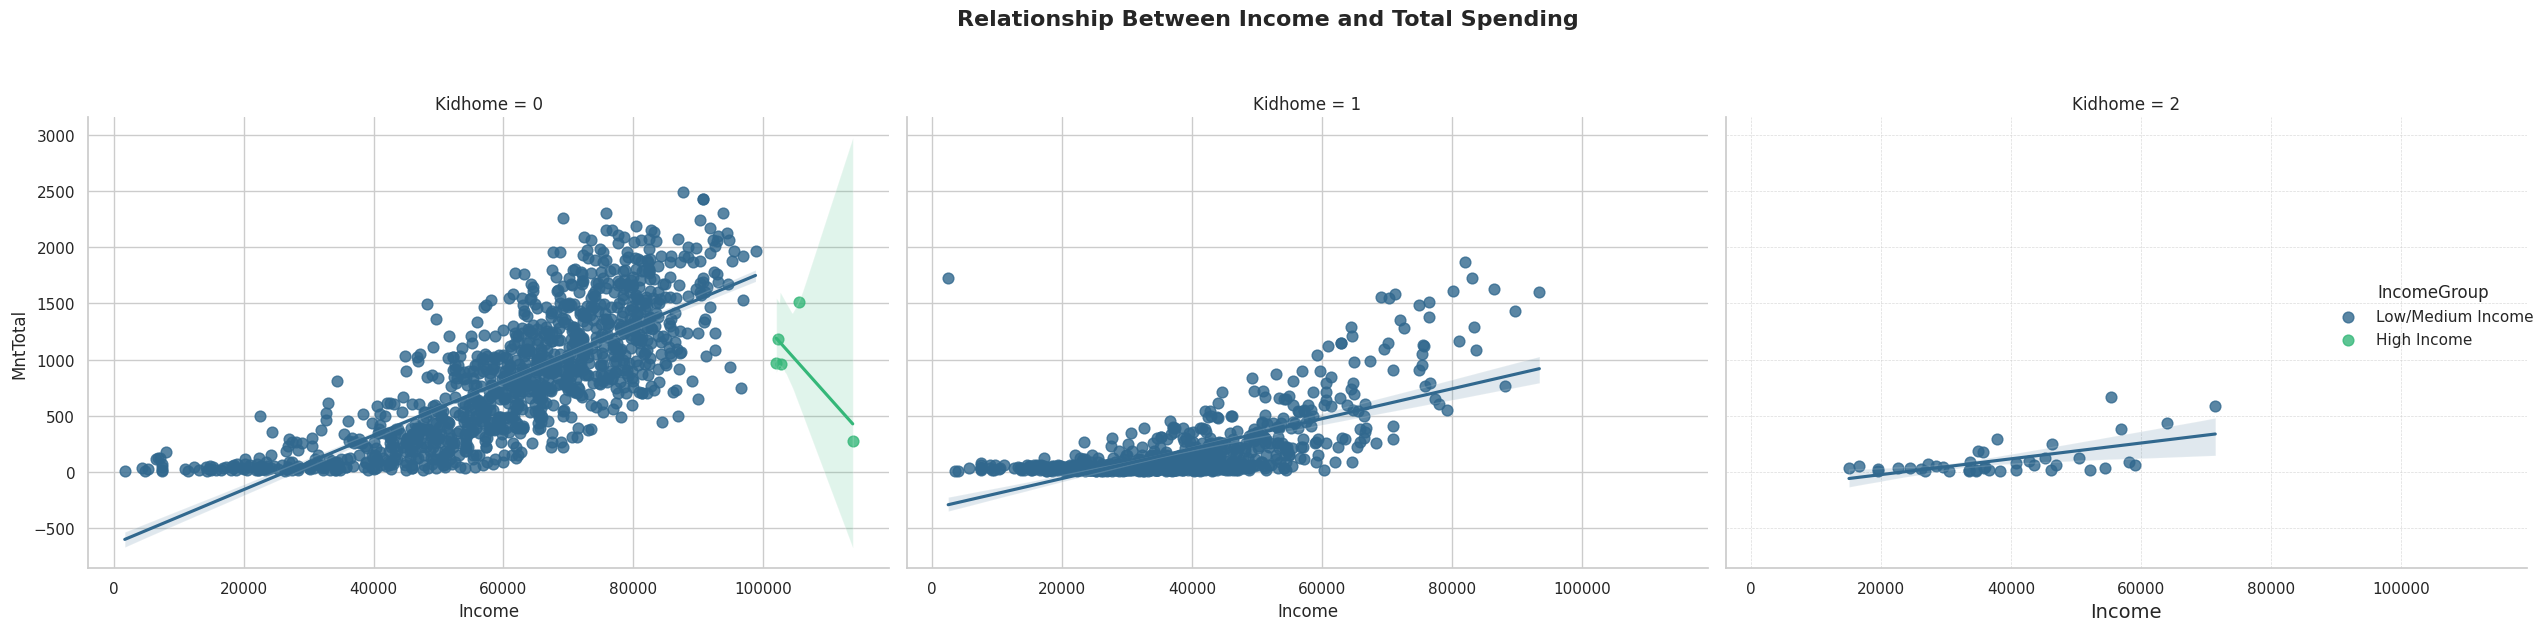

In [8]:
# Segmenting data into High Income and Others
df['IncomeGroup'] = ['High Income' if x >= 100000 else 'Low/Medium Income' for x in df['Income']]

# Plot
sns.lmplot(
    x='Income',
    y='MntTotal',  # Correct column name
    data=df[df['Income'] < 200000],
    hue='IncomeGroup',  # Color by Income Group
    col='Kidhome',  # Correct column name
    palette='viridis',  # Use a vibrant color palette
    height=6,
    aspect=1.3,
    scatter_kws={'s': 60, 'alpha': 0.8}  # Larger markers with some transparency
)

# Plot design
plt.suptitle('Relationship Between Income and Total Spending', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Income', fontsize=14)
plt.ylabel('Total Spending (MntTotal)', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Adding gridlines
plt.tight_layout()
plt.show()


By constructing a ‘Dependents’ variable, I analyzed how family responsibilities influence discretionary spending and deal sensitivity-a key input for promotion design and basket-level targeting.

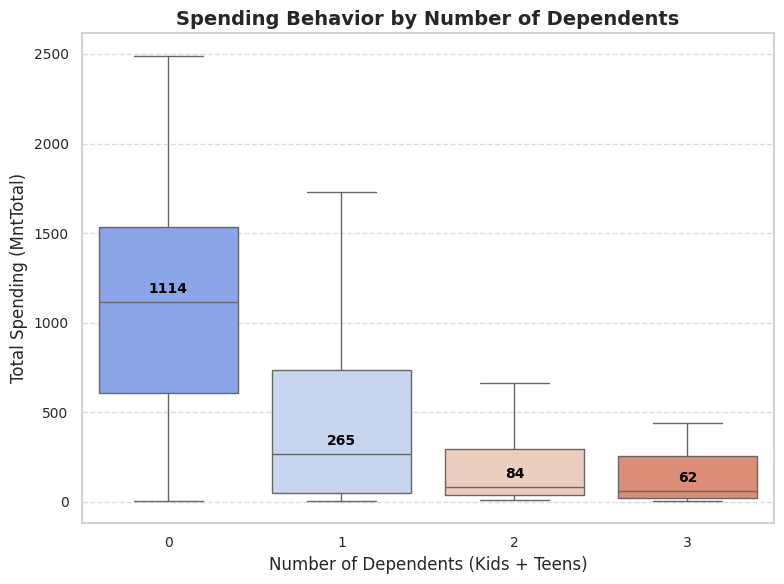

In [9]:
# Create a new column for dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# Plot the improved boxplot
plt.figure(figsize=(8, 6))  # Adjusted size for better readability
sns.boxplot(
    x='Dependents',
    y='MntTotal',
    data=df,
    palette="coolwarm",  # Adding a color palette for better distinction
    showfliers=False  # Hides outliers for cleaner visualization
)
plt.title("Spending Behavior by Number of Dependents", fontsize=14, weight='bold')
plt.xlabel("Number of Dependents (Kids + Teens)", fontsize=12)
plt.ylabel("Total Spending (MntTotal)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines for readability

# Annotate median values on each box
medians = df.groupby("Dependents")["MntTotal"].median()
for i, median in enumerate(medians):
    plt.text(
        i,
        median + 50,  # Offset text above the boxplot
        f"{median:.0f}",
        ha="center",
        color="black",
        fontsize=10,
        fontweight="bold"
    )

plt.tight_layout()  # Adjust layout to fit labels
plt.show()


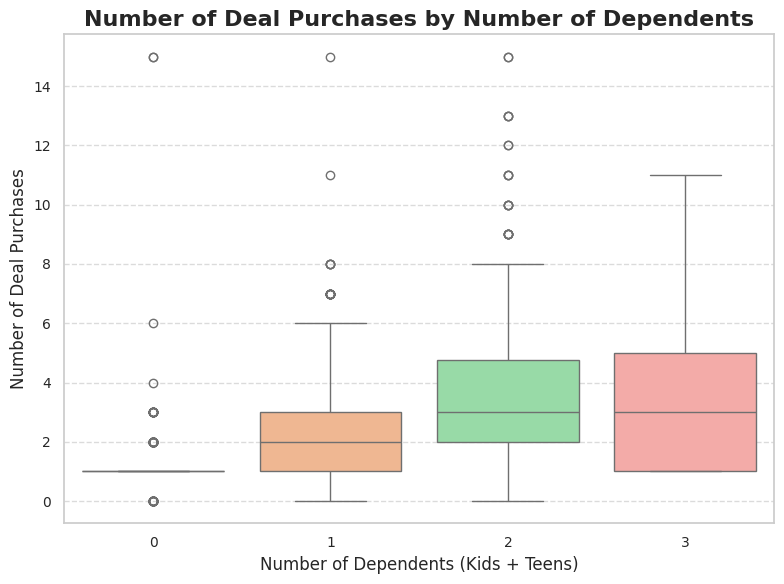

In [10]:
# Create the boxplot with enhancements
plt.figure(figsize=(8, 6))  # Adjusted figure size for clarity
sns.boxplot(
    x='Dependents',
    y='NumDealsPurchases',
    data=df,
    palette='pastel'  # Soft color palette for better aesthetics
)
plt.title('Number of Deal Purchases by Number of Dependents', fontsize=16, fontweight='bold')
plt.xlabel('Number of Dependents (Kids + Teens)', fontsize=12)
plt.ylabel('Number of Deal Purchases', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Light grid for better comparison
plt.tight_layout()  # Adjusts spacing to prevent clipping
plt.show()


Campaign acceptance was aggregated to examine whether promotions attract value-driven consumers or already high-income, low-price-sensitive segments. This distinguishes revenue growth from margin erosion.

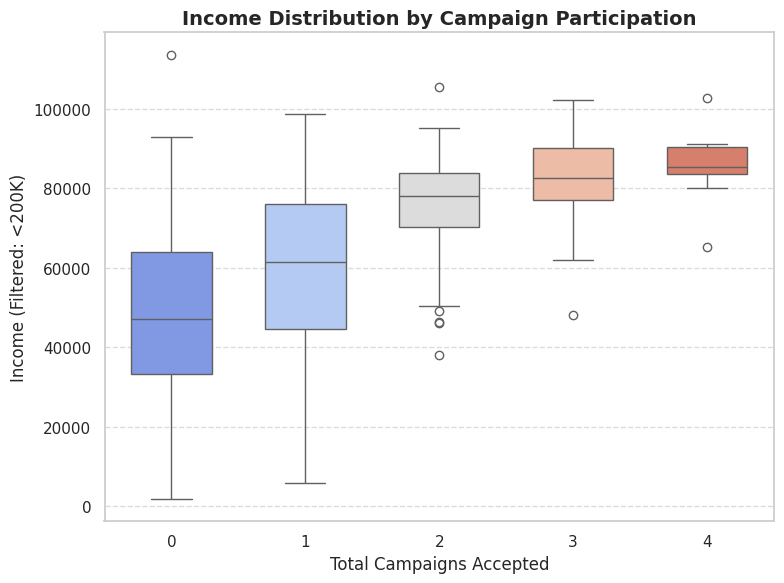

In [11]:
# Create TotalCampaignsAcc if it doesn't exist
df['TotalCampaignsAcc'] = (
    df['AcceptedCmp1'] +
    df['AcceptedCmp2'] +
    df['AcceptedCmp3'] +
    df['AcceptedCmp4'] +
    df['AcceptedCmp5']
)

# Boxplot with the updated data
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='TotalCampaignsAcc',
    y='Income',
    data=df[df['Income'] < 200000],
    palette="coolwarm",
    width=0.6
)
plt.title('Income Distribution by Campaign Participation', fontsize=14, fontweight='bold')
plt.xlabel('Total Campaigns Accepted', fontsize=12)
plt.ylabel('Income (Filtered: <200K)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


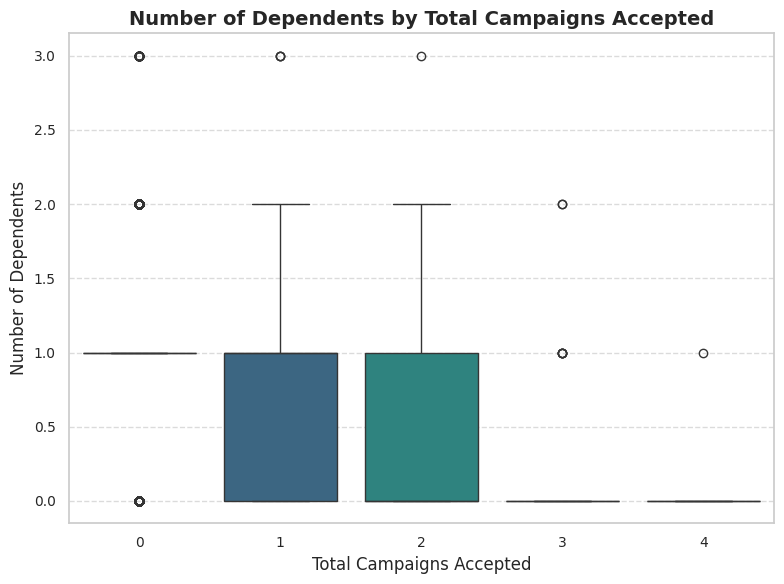

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='TotalCampaignsAcc',
    y='Dependents',
    data=df,
    palette='viridis'
)

# Adding labels and title
plt.title('Number of Dependents by Total Campaigns Accepted', fontsize=14, fontweight='bold')
plt.xlabel('Total Campaigns Accepted', fontsize=12)
plt.ylabel('Number of Dependents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Comparing web visits with deal purchases reveals whether online traffic is driven by bargain-hunting or genuine purchase intent- informing discount depth and frequency.

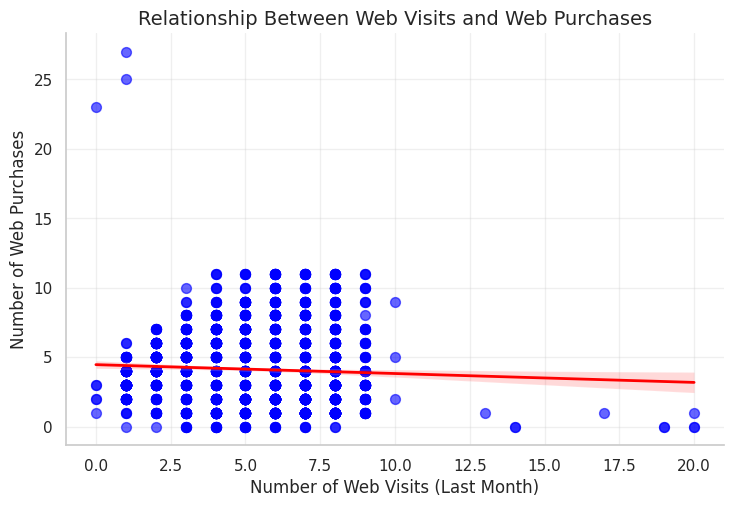

In [13]:
sns.lmplot(
    x='NumWebVisitsMonth',
    y='NumWebPurchases',
    data=df,
    height=5,
    aspect=1.5,
    scatter_kws={'alpha': 0.6, 's': 50, 'color': 'blue'},
    line_kws={'color': 'red', 'linewidth': 2}
)

# Add labels and title
plt.xlabel("Number of Web Visits (Last Month)", fontsize=12)
plt.ylabel("Number of Web Purchases", fontsize=12)
plt.title("Relationship Between Web Visits and Web Purchases", fontsize=14)
plt.grid(alpha=0.3)
plt.show()


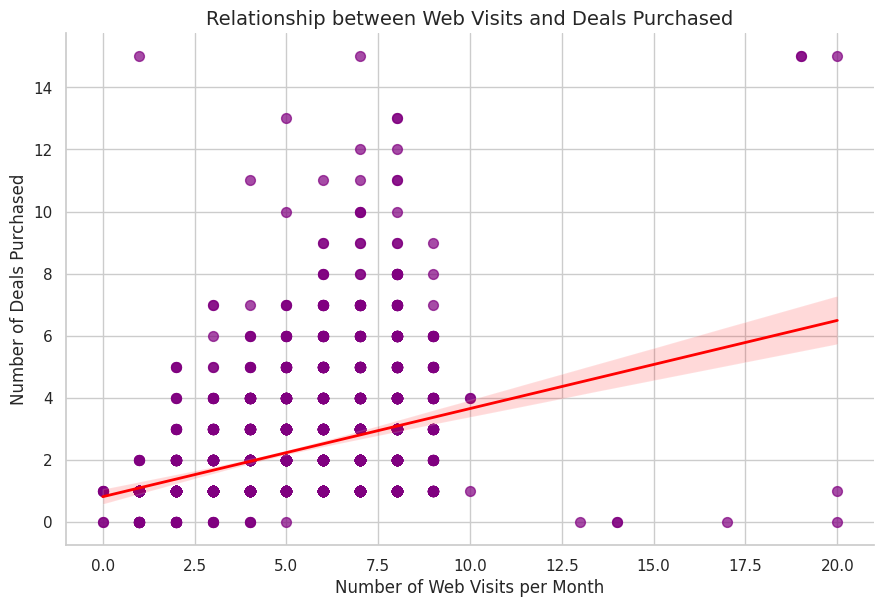

In [14]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df,
           aspect=1.5,
           scatter_kws={'s': 50, 'alpha': 0.7, 'color': 'purple'},
           line_kws={'color': 'red', 'lw': 2}, # Line style for regression line
           height=6)

# Set labels and title
plt.xlabel('Number of Web Visits per Month', fontsize=12)
plt.ylabel('Number of Deals Purchased', fontsize=12)
plt.title('Relationship between Web Visits and Deals Purchased', fontsize=14)

# Show the plot
plt.show()


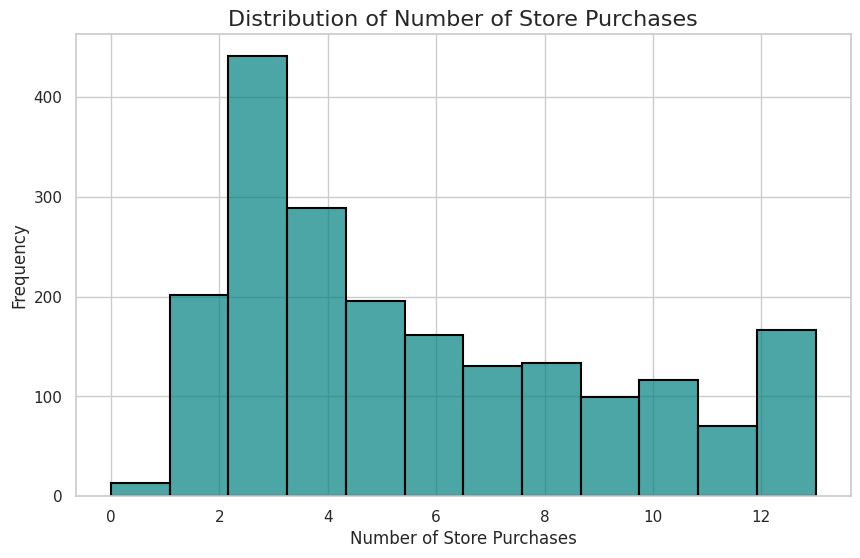

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Improved distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['NumStorePurchases'], kde=False, bins=12, color='teal',
             edgecolor='black', linewidth=1.5, alpha=0.7)

# Add title and labels
plt.title('Distribution of Number of Store Purchases', size=16)
plt.xlabel('Number of Store Purchases', size=12)
plt.ylabel('Frequency', size=12)
plt.show()


A linear regression model was built to quantify drivers of in-store purchases. Feature scaling ensured coefficient comparability, while train-test splitting preserved out-of-sample validity.

Linear regression model RMSE: 2.1036
R-squared value: 0.5821
Median value of target variable: 5.0


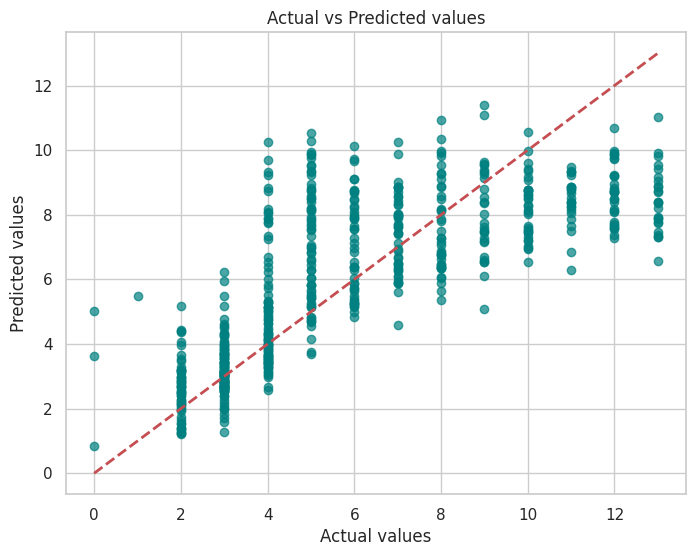

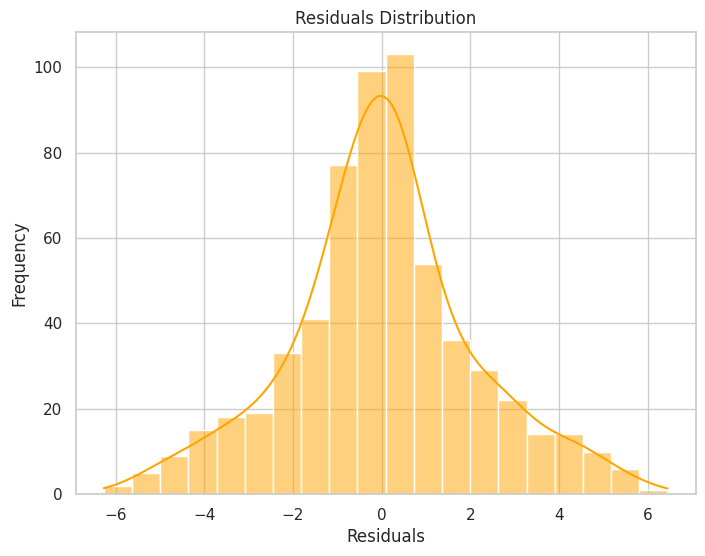

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# One-Hot Encoding for 'IncomeGroup' column
df_encoded = pd.get_dummies(df, columns=['IncomeGroup'], drop_first=True)

# Isolate X and y variables
X = df_encoded.drop(columns='NumStorePurchases')
y = df_encoded['NumStorePurchases']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
preds = model.predict(X_test_scaled)

# Evaluate model using RMSE and other metrics
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print(f"Linear regression model RMSE: {rmse:.4f}")
print(f"R-squared value: {r2:.4f}")
print(f"Median value of target variable: {y.median()}")

# Plotting predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, color='teal', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.show()

# Analyzing residuals
residuals = y_test - preds
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='orange', bins=20)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


Permutation importance was used to identify which variables genuinely influence predictions, allowing translation from statistical output to actionable business levers.

In [17]:
from sklearn.inspection import permutation_importance

# Fit the model on the training data
model.fit(X_train, y_train)

# Apply Permutation Importance on the model
perm = permutation_importance(model, X_test, y_test, random_state=1)

# Show feature importance for the top 10 features
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm.importances_mean
})
top_10_features = feature_importance.nlargest(10, 'Importance')
print(top_10_features)


              Feature  Importance
35           MntTotal    0.310894
0              Income    0.202601
10  NumDealsPurchases    0.065544
6     MntMeatProducts    0.055195
13  NumWebVisitsMonth    0.046330
22           Response    0.023115
11    NumWebPurchases    0.019438
38         Dependents    0.015874
1             Kidhome    0.011911
16       AcceptedCmp5    0.005794


A focused analysis on gold product spending explores whether premium product engagement predicts higher store visits informing cross-sell and loyalty strategies.

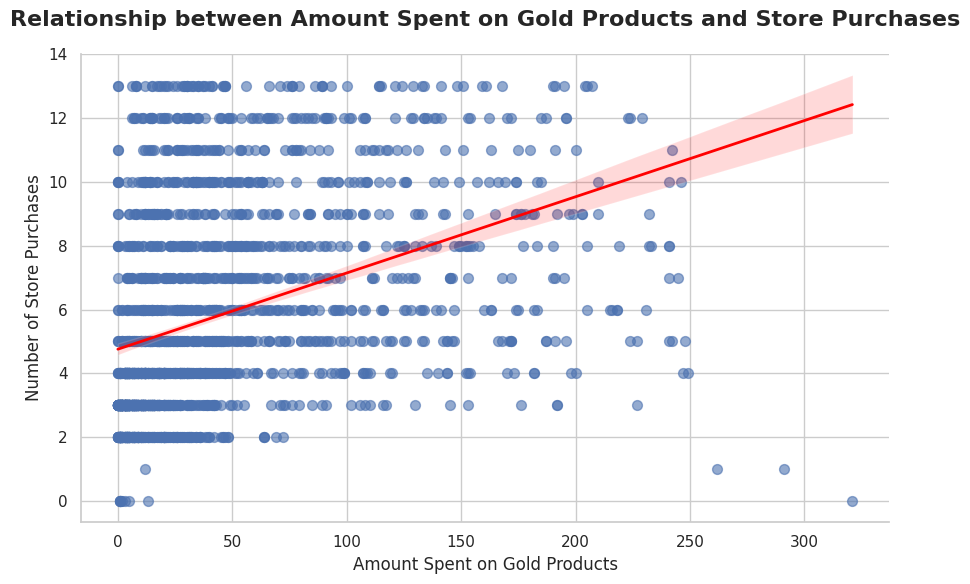

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style('whitegrid')

# Create lmplot
sns.lmplot(x='MntGoldProds', y='NumStorePurchases', data=df,
           aspect=1.5, height=6, scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'red', 'lw': 2})

# Add title and labels
plt.title('Relationship between Amount Spent on Gold Products and Store Purchases', size=16, weight='bold', pad=20)
plt.xlabel('Amount Spent on Gold Products', size=12)
plt.ylabel('Number of Store Purchases', size=12)

# Show the plot
plt.tight_layout()
plt.show()


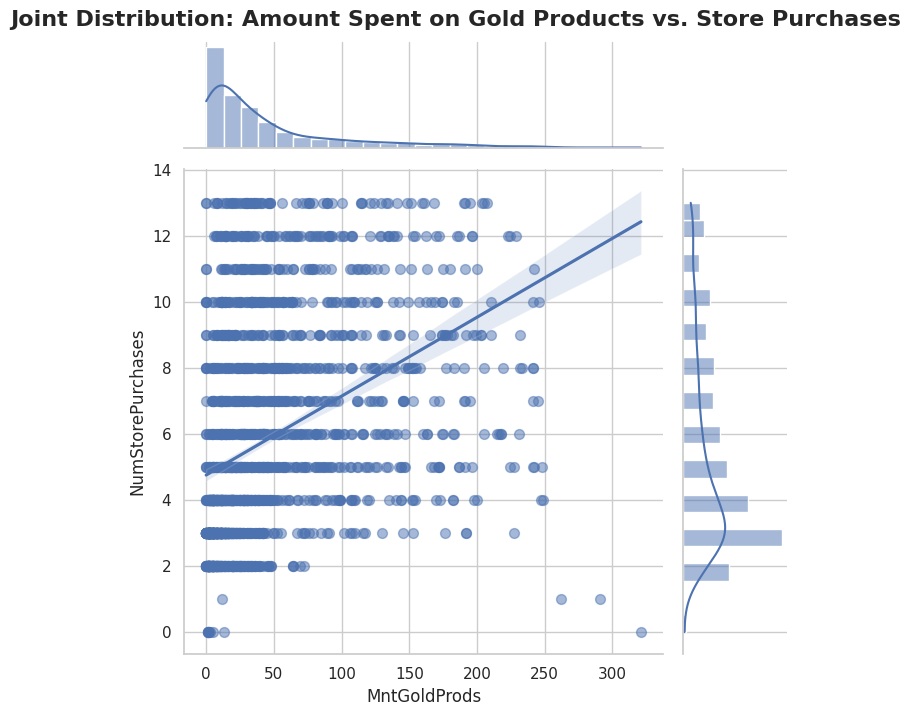

In [22]:
sns.jointplot(x='MntGoldProds', y='NumStorePurchases', data=df, kind='reg',
              height=7, ratio=4, marginal_kws={'bins': 25, 'fill': True},
              scatter_kws={'alpha': 0.5, 's': 50})

# Add a title to the plot
plt.suptitle('Joint Distribution: Amount Spent on Gold Products vs. Store Purchases',
             size=16, weight='bold', y=1.02)

plt.show()


Kendall correlation and hypothesis testing were applied to validate observed patterns statistically, ensuring insights are not driven by visual coincidence.

In [23]:
from scipy.stats import kendalltau

# Compute Kendall's Tau correlation
kendall_corr = kendalltau(x=df['MntGoldProds'], y=df['NumStorePurchases'])

# Print results with a more descriptive output
print(f"Kendall's Tau correlation between 'Amount Spent on Gold Products' and 'Store Purchases': {kendall_corr.correlation:.4f}")
print(f"P-value of the correlation: {kendall_corr.pvalue:.4e}")

# Interpretation based on p-value
if kendall_corr.pvalue < 0.05:
    print("The correlation is statistically significant at the 5% level.")
else:
    print("The correlation is not statistically significant.")


Kendall's Tau correlation between 'Amount Spent on Gold Products' and 'Store Purchases': 0.3866
P-value of the correlation: 1.9955e-133
The correlation is statistically significant at the 5% level.


/tmp/ipython-input-1814543014.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MntFishProducts'], kde=False, hist=True, bins=12)


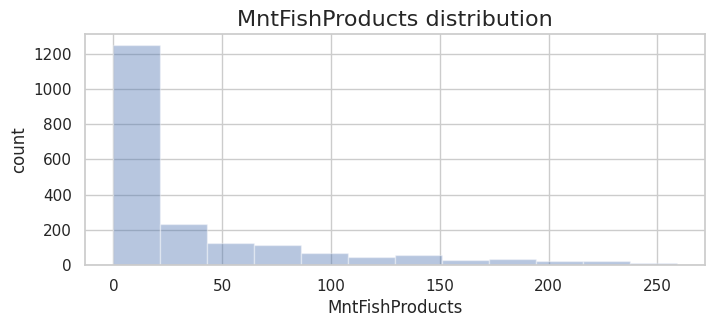

In [28]:
plt.figure(figsize=(8,3))
sns.distplot(df['MntFishProducts'], kde=False, hist=True, bins=12)
plt.title('MntFishProducts distribution', size=16)
plt.ylabel('count');

This project moves beyond descriptive analytics to decision-oriented insights, combining robust statistics, segmentation logic, and predictive modeling to understand who buys, why they buy, and how marketing can influence them profitably.